Se cargan las librerias

In [1]:
import pandas as pd
import numpy as np

import sklearn.linear_model
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import median_absolute_error, r2_score
from scipy import stats
from patsy import dmatrices
from collections import OrderedDict
import itertools
import statsmodels.formula.api as smf
import sys
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Se cargan los datos

In [0]:
data=pd.read_csv("https://github.com/ANN-2019-2/evaluacion-Camfez92/blob/master/datos/diabetes.csv?raw=true",sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

Ahora, veamos de manera descriptiva como se relacionan las variables con la Diabetis "Y"

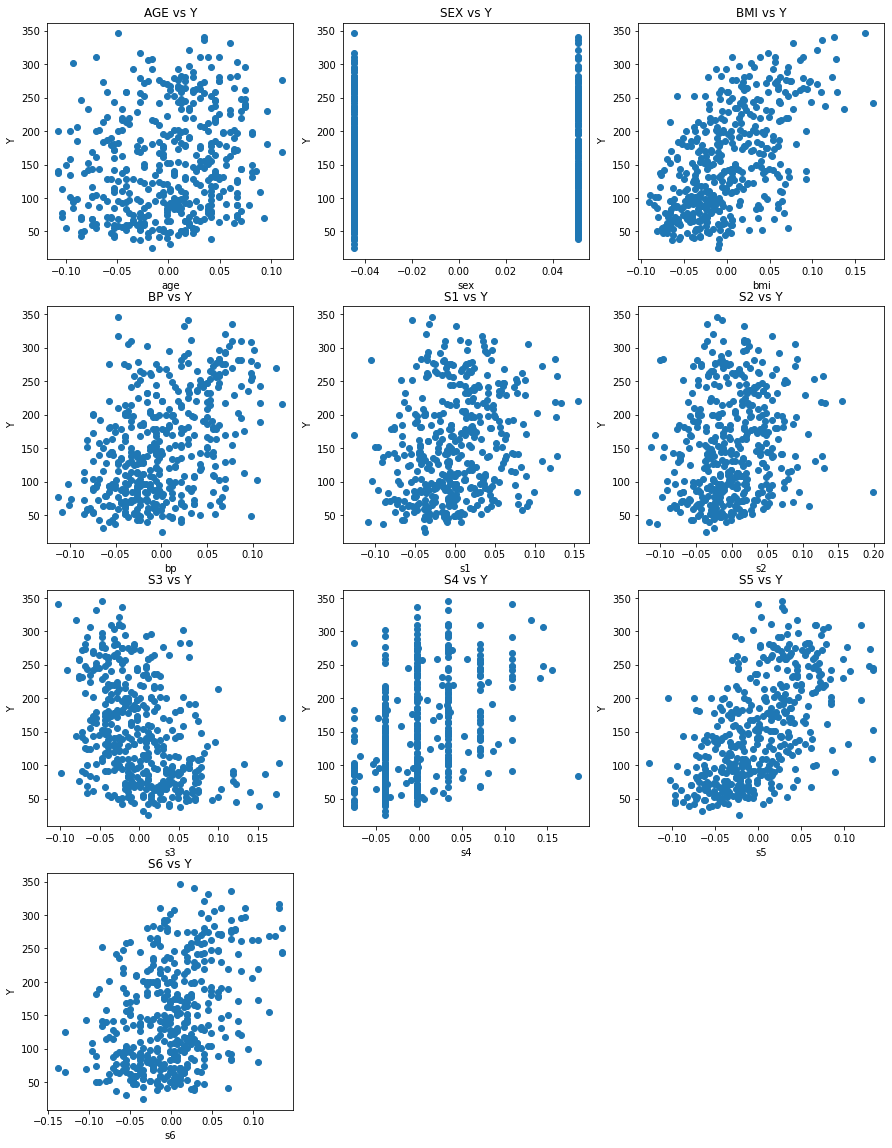

In [3]:
plt.figure(figsize=(15,20))
plt.subplot(4, 3, 1)
plt.scatter(data["age"], data["Y"]);
plt.title('AGE vs Y')
plt.xlabel('age')
plt.ylabel('Y')

plt.subplot(4, 3, 2)
plt.scatter(data["sex"], data["Y"]);
plt.title('SEX vs Y')
plt.xlabel('sex')
plt.ylabel('Y')

plt.subplot(4,3,3)
plt.scatter(data["bmi"], data["Y"]);
plt.title('BMI vs Y')
plt.xlabel('bmi')
plt.ylabel('Y')

plt.subplot(4,3,4)
plt.scatter(data["bp"], data["Y"]);
plt.title('BP vs Y')
plt.xlabel('bp')
plt.ylabel('Y')

plt.subplot(4,3,5)
plt.scatter(data["s1"], data["Y"]);
plt.title('S1 vs Y')
plt.xlabel('s1')
plt.ylabel('Y')

plt.subplot(4,3,6)
plt.scatter(data["s2"], data["Y"]);
plt.title('S2 vs Y')
plt.xlabel('s2')
plt.ylabel('Y')

plt.subplot(4,3,7)
plt.scatter(data["s3"], data["Y"]);
plt.title('S3 vs Y')
plt.xlabel('s3')
plt.ylabel('Y')

plt.subplot(4,3,8)
plt.scatter(data["s4"], data["Y"]);
plt.title('S4 vs Y')
plt.xlabel('s4')
plt.ylabel('Y')

plt.subplot(4,3,9)
plt.scatter(data["s5"], data["Y"]);
plt.title('S5 vs Y')
plt.xlabel('s5')
plt.ylabel('Y')

plt.subplot(4,3,10)
plt.scatter(data["s6"], data["Y"]);
plt.title('S6 vs Y')
plt.xlabel('s6')
plt.ylabel('Y')

plt.show()

Es evidente que existe una relación lineal entre algunas variables con la diabetes, como bmi, bp, s3, s5, s6. En las demás, es dificil tomar una decisión.

Apliquemos Akaike, busquemos las variables relacionadas y la mejor combinación entre estas segun AIC.

El siguiente código fue obtenido de: https://towardsdatascience.com/the-akaike-information-criterion-c20c8fd832f2

y fue adaptado para el propósito de este trabajo, los nombres de las variables se cambiaron así:

age=TAVG_LAG_1, sex=TAVG_LAG_2, bmi=TAVG_LAG_3, bp=TAVG_LAG_4, s1=TAVG_LAG_5, s2=TAVG_LAG_6, s3=TAVG_LAG_7, s4=TAVG_LAG_8, s5=TAVG_LAG_9, s6=TAVG_LAG_10

In [3]:
df_lagged=data.copy()
df_lagged.columns=["TAVG_LAG_1","TAVG_LAG_2","TAVG_LAG_3","TAVG_LAG_4","TAVG_LAG_5","TAVG_LAG_6","TAVG_LAG_7","TAVG_LAG_8","TAVG_LAG_9","TAVG_LAG_10","TAVG"]

split_index = round(len(df_lagged)*0.8)
split_date = df_lagged.index[split_index]
df_train = df_lagged.loc[df_lagged.index <= split_date].copy()
df_test = df_lagged.loc[df_lagged.index > split_date].copy()

lag_combinations = OrderedDict()
l = list(range(1,11,1))

for i in range(1, 11, 1):
   for combination in itertools.combinations(l, i):
      lag_combinations[combination] = 0.0



#Current minimum AIC score
min_aic = sys.float_info.max
#Model expression for the best model seen so far
best_expr = ''
#OLSResults objects for the best model seen so far
best_olsr_model_results = None

expr_prefix = 'TAVG ~ '
#Run through each lag combination
for combination in lag_combinations:
  expr = expr_prefix
   
  i = 1
   #Build the model's expression in patsy notation, for e.g. 'TAVG ~ TAVG_LAG_1 + TAVG_LAG_2' represents a model containing two lag variables and TAVG_LAG_1 and TAVG_LAG_2 plus the intercept
  for lag_num in combination:
    if i < len(combination):
      expr = expr + 'TAVG_LAG_' + str(lag_num) + ' + '
    else:
      expr = expr + 'TAVG_LAG_' + str(lag_num)

    i += 1

  print('Building OLSR model for expr: ' + expr)

    
    #Build and fit the OLSR model using statsmodels
  olsr_results = smf.ols(expr, df_train).fit()

    #Store away the model's AIC score
  lag_combinations[combination] = olsr_results.aic
  print('AIC='+str(lag_combinations[combination]))
  #If the model's AIC score is less than the current minimum score, update the current minimum AIC score and the current best model
  if olsr_results.aic < min_aic:
    min_aic = olsr_results.aic
    best_expr = expr
    best_olsr_model_results = olsr_results

Building OLSR model for expr: TAVG ~ TAVG_LAG_1
AIC=4078.0142444737357
Building OLSR model for expr: TAVG ~ TAVG_LAG_2
AIC=4088.618470478722
Building OLSR model for expr: TAVG ~ TAVG_LAG_3
AIC=3941.1474659073747
Building OLSR model for expr: TAVG ~ TAVG_LAG_4
AIC=4018.900380889396
Building OLSR model for expr: TAVG ~ TAVG_LAG_5
AIC=4068.4901611818486
Building OLSR model for expr: TAVG ~ TAVG_LAG_6
AIC=4074.0844756154984
Building OLSR model for expr: TAVG ~ TAVG_LAG_7
AIC=4032.1982100101723
Building OLSR model for expr: TAVG ~ TAVG_LAG_8
AIC=4011.055661127505
Building OLSR model for expr: TAVG ~ TAVG_LAG_9
AIC=3949.8235990896483
Building OLSR model for expr: TAVG ~ TAVG_LAG_10
AIC=4027.53247126085
Building OLSR model for expr: TAVG ~ TAVG_LAG_1 + TAVG_LAG_2
AIC=4079.985878709036
Building OLSR model for expr: TAVG ~ TAVG_LAG_1 + TAVG_LAG_3
AIC=3941.376555888789
Building OLSR model for expr: TAVG ~ TAVG_LAG_1 + TAVG_LAG_4
AIC=4020.154644959651
Building OLSR model for expr: TAVG ~ TAVG_LAG

Ahora, veamos la mejor combinación

In [4]:
print(best_olsr_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:                   TAVG   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     59.01
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           3.65e-50
Time:                        17:05:31   Log-Likelihood:                -1917.8
No. Observations:                 355   AIC:                             3850.
Df Residuals:                     348   BIC:                             3877.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.0491      2.879     52.809      0.0

Lo que resulta que las variables sexo, índice de masa corporal, presión sanguinea, s1,s2 y s5 tienen por lo menos un 95% de confianza segun t-test y el AIC menor encontrado fue en esta combinación, con un valor de aproximadamente 3850 y, por lo tanto, es nuestra mejor combinación de variables.

Nuestro Modelo lineal quedaría de la siguiente forma:

Yi=W0 + W1X1i + W2X2i + W3X3i + W4X4i + W5X5i + W6X6i

Donde:

*   W0=152.0491
*   X1=sex
*   X2=bmi
*   X3=bp
*   X4=S1
*   X5=S2
*   X6=S5
*   Wi= coeficientes dados en la tabla anterior (coef)











Con statsmodel podemos extraer los coeficientes y hallar predicciones, quedemonos con las variables independientes importantes para nuestro modelo y apliquemos cross-validation

In [5]:
X=data[["sex","bmi","bp","s1","s2","s5"]]
Y=data["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

lm = sklearn.linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
print("Intercepto: ",model.intercept_)
print("Coeficientes del modelo: ",model.coef_)

Intercepto:  150.67534286556076
Coeficientes del modelo:  [ -349.42803923   501.39976312   386.96316714 -1026.01196362
   812.71511486   833.66864973]


In [6]:
scores = cross_val_score(model, X, Y, cv=4)
print ("Cross-validated scores:", scores)
predictions = cross_val_predict(model, X, Y, cv=4)

Cross-validated scores: [0.3775882  0.49824774 0.52008326 0.56331318]


Ahora, veamos los resultados

R2 =  0.5057389395954441
Error medio absoluto =  37.965823429711946


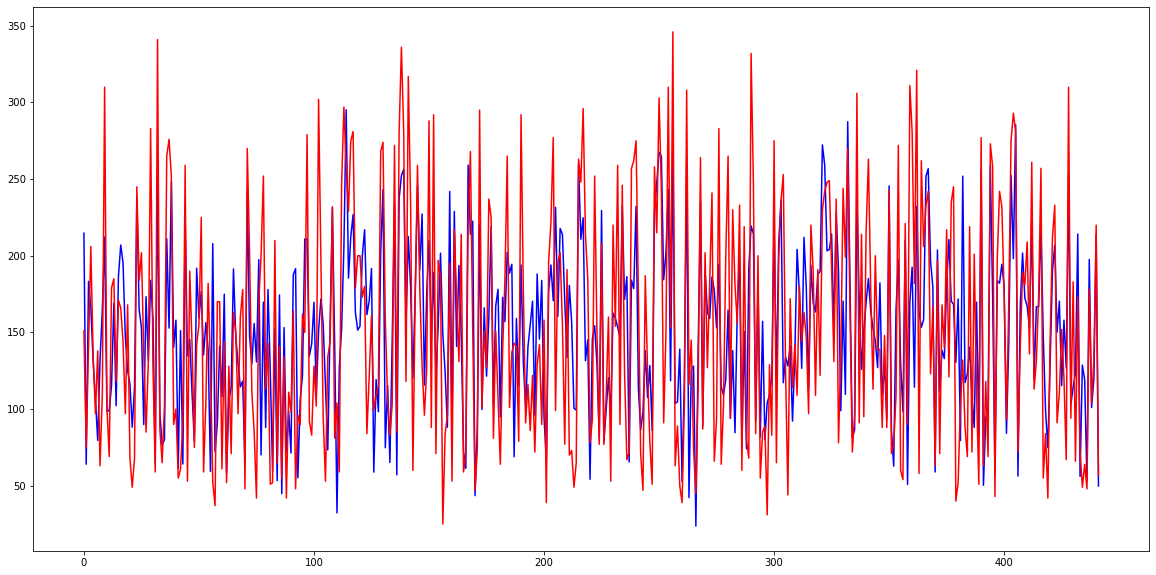

In [7]:
plt.figure(figsize=(20,10))
#plt.subplot(2, 1, 1)
plt.plot(predictions,"Blue");
#plt.title("PREDICCIONES")
#plt.subplot(2, 1, 2)
plt.plot(Y,"Red");
#plt.title('Y REAL')

print("R2 = ",r2_score(Y,predictions))
print("Error medio absoluto = ",median_absolute_error(Y, predictions))

Ahora, usemos una red neuronal

In [0]:
XX_train, XX_test, yy_train, yy_test = train_test_split(X, Y, test_size=0.25)

In [0]:
m = sklearn.neural_network.MLPRegressor(
                 hidden_layer_sizes = (10,2),  # Una capa oculta con 100 neuronas
                 activation = 'logistic',    #  {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
                 solver = 'sgd',             #  {‘lbfgs’, ‘sgd’, ‘adam’}
                 alpha = 0.0,                #
                 learning_rate_init = 0.001,   # Valor de la tasa de aprendizaje
                 learning_rate = 'constant', # La tasa no se adapta automáticamente
                 verbose = False,            # Reporte del proceso de optimización
                 shuffle = True,             #
                 tol = 1e-8,                 #
                 max_iter = 25000,           # Número máximo de iteraciones
                 momentum = 0.0,             #
                 nesterovs_momentum = False) #


In [41]:
m.fit(XX_train,yy_train)                                  # Entrena el modelo

MLPRegressor(activation='logistic', alpha=0.0, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 2), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=25000,
             momentum=0.0, n_iter_no_change=10, nesterovs_momentum=False,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=1e-08, validation_fraction=0.1, verbose=False,
             warm_start=False)

Y ahora, veamos que tan bueno es el modelo

In [42]:
m.score(XX_test,yy_test)

-0.028320751174674808